## DỰ BÁO ĐỘ PHỔ BIẾN CỦA BÀI HÁT KPOP TRÊN SPOTIFY

### Thông tin dữ liệu

Import thư viện

In [126]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore") 

Đọc dữ liệu từ file

In [127]:
df = pd.read_csv('raw_data.csv')

In [128]:
df.head(5)

,song_id,name,artist_name,album,duration_ms,track_number,artist_follower,album_popularity,artist_popularity,release_date,crawl_date,song_popularity,genres
0,2jaapqz7L9MpMf7vpkqU9I,Smoothie,NCT DREAM,DREAM( )SCAPE,188080,2,7604621,70,74,25/3/2024,1/4/2024,68,['k-pop boy group']
1,11sirgYaEutV40tkvgpHN6,NEURON (with Gaeko & YOON MIRAE),j-hope,HOPE ON THE STREET VOL.1,273290,6,17174554,74,72,29/3/2024,1/4/2024,73,"['k-pop', 'k-rap']"
2,4lR8sYGMGZPvthF2yUfo7T,Smart,LE SSERAFIM,EASY,166384,4,4785169,87,82,19/2/2024,1/4/2024,87,['k-pop girl group']
3,0PBTlQ84CBJF0tBnKGmQa6,FRI(END)S,V,FRI(END)S,148082,1,17572291,87,83,15/3/2024,1/4/2024,91,"['j-division', 'korean ost']"
4,55W3ONBbW98Cqvk0ZIoaKR,Emptiness,BoA,Emptiness,186866,1,816479,48,54,26/3/2024,1/4/2024,54,['k-pop']


Dưới đây là mô tả ngắn gọn về các trường dữ liệu từ API của Spotify:

1. **`song_id`**: ID của bài hát trên Spotify.
2. **`name`**: Tên của bài hát.
3. **`artist_name`**: Tên của nghệ sĩ hoặc nhóm nghệ sĩ biểu diễn bài hát.
4. **`album`**: Tên của album chứa bài hát.
5. **`duration_ms`**: Thời lượng của bài hát tính bằng mili giây.
6. **`track_number`**: Số thứ tự của bài hát trong album.
7. **`artist_followers`**: Số lượng người theo dõi nghệ sĩ trên Spotify.
8. **`song_popularity`**: Độ phổ biến của bài hát, được tính dựa trên số người nghe trong thời gian gần đây
9. **`album_popularity`**: Độ phổ biến của album, dựa trên độ phổ biến của các bài hát trong album.
10. **`artist_popularity`**: Độ phổ biến của nghệ sĩ, dựa trên độ phổ biến của các bài hát của nghệ sĩ.
11. **`release_date`**: Ngày phát hành bài hát.
12. **`crawl_date`**: Ngày dữ liệu được thu thập từ Spotify.
13. **`genres`**: Thể loại âm nhạc.

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4585 entries, 0 to 4584
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   song_id            4585 non-null   object
 1   name               4585 non-null   object
 2   artist_name        4585 non-null   object
 3   album              4585 non-null   object
 4   duration_ms        4585 non-null   int64 
 5   track_number       4585 non-null   int64 
 6   artist_follower    4585 non-null   int64 
 7   album_popularity   4585 non-null   int64 
 8   artist_popularity  4585 non-null   int64 
 9   release_date       4585 non-null   object
 10  crawl_date         4585 non-null   object
 11  song_popularity    4585 non-null   int64 
 12  genres             4585 non-null   object
dtypes: int64(6), object(7)
memory usage: 465.8+ KB


Xử lý dữ liệu thô

In [130]:
# Đổi dữ liệu cột 'genres' từ dạng string sang dạng list
df['genres'] = df['genres'].apply(eval)
df['genres'] = df['genres'].apply(lambda x: x if x else None)

# Chuyển đổi các giá trị trong cột ngày tháng thành đối tượng datetime
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce', dayfirst=False)
df['crawl_date'] = pd.to_datetime(df['crawl_date'], errors='coerce', dayfirst=True)

# Tính toán khoảng thời gian từ khi bài hát được phát hành cho đến khi crawl dữ liệu
df['days_diff'] = (df['crawl_date'] - df['release_date']).dt.days + 1
df['days_diff'] = df['days_diff'].apply(lambda x: x if x > 0 else None) 

# Chuyển đổi 'duration' từ đơn vị milis sang đơn vị giây
df['duration'] = df['duration_ms'].apply(lambda x: x / 1000)

df_original = df.copy()

df.head()

,song_id,name,artist_name,album,duration_ms,track_number,artist_follower,album_popularity,artist_popularity,release_date,crawl_date,song_popularity,genres,days_diff,duration
0,2jaapqz7L9MpMf7vpkqU9I,Smoothie,NCT DREAM,DREAM( )SCAPE,188080,2,7604621,70,74,2024-03-25,2024-04-01,68,[k-pop boy group],8.0,188.080
1,11sirgYaEutV40tkvgpHN6,NEURON (with Gaeko & YOON MIRAE),j-hope,HOPE ON THE STREET VOL.1,273290,6,17174554,74,72,2024-03-29,2024-04-01,73,"[k-pop, k-rap]",4.0,273.290
2,4lR8sYGMGZPvthF2yUfo7T,Smart,LE SSERAFIM,EASY,166384,4,4785169,87,82,2024-02-19,2024-04-01,87,[k-pop girl group],43.0,166.384
3,0PBTlQ84CBJF0tBnKGmQa6,FRI(END)S,V,FRI(END)S,148082,1,17572291,87,83,2024-03-15,2024-04-01,91,"[j-division, korean ost]",18.0,148.082
4,55W3ONBbW98Cqvk0ZIoaKR,Emptiness,BoA,Emptiness,186866,1,816479,48,54,2024-03-26,2024-04-01,54,[k-pop],7.0,186.866


In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4585 entries, 0 to 4584
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   song_id            4585 non-null   object        
 1   name               4585 non-null   object        
 2   artist_name        4585 non-null   object        
 3   album              4585 non-null   object        
 4   duration_ms        4585 non-null   int64         
 5   track_number       4585 non-null   int64         
 6   artist_follower    4585 non-null   int64         
 7   album_popularity   4585 non-null   int64         
 8   artist_popularity  4585 non-null   int64         
 9   release_date       4585 non-null   datetime64[ns]
 10  crawl_date         4585 non-null   datetime64[ns]
 11  song_popularity    4585 non-null   int64         
 12  genres             4551 non-null   object        
 13  days_diff          4578 non-null   float64       
 14  duration

### Xử lý dữ liệu

#### Xử lý dữ liệu trống

In [132]:
print('Kiểm tra số giá trị thiếu trong mỗi cột:')
df.isnull().sum()

Kiểm tra số giá trị thiếu trong mỗi cột:


song_id               0
name                  0
artist_name           0
album                 0
duration_ms           0
track_number          0
artist_follower       0
album_popularity      0
artist_popularity     0
release_date          0
crawl_date            0
song_popularity       0
genres               34
days_diff             7
duration              0
dtype: int64

Đặc trưng genres và days_diff có giá trị trống cần xử lý.
Vì số lượng dữ liệu trống ít nên ta tiến hành xử lý bằng cách thay thế bằng genres và days_diff xuất hiện nhều nhất.

* Xử lý missing value cho cột 'days_diff'

In [133]:
# Tìm giá trị mode của cột 'days_diff'
mode_days_diff = df['days_diff'].mode()[0]
print(f'Giá trị xuất hiện nhiều nhất trong cột Days Diff: {mode_days_diff}')

# Thay thế các giá trị thiếu trong cột 'days_diff' bằng giá trị mode
df['days_diff'].fillna(mode_days_diff, inplace=True)

Giá trị xuất hiện nhiều nhất trong cột Days Diff: 4.0


* Xử lý missing value cho cột 'genres'

In [134]:
# Tạo danh sách genres
list_genres = []
for genre in df['genres']:
    if genre is not None:
        list_genres.append(genre)
    else:
        list_genres.append([])

# Tạo một list chứa tất cả các giá trị trong cột Genres
all_genres = sum(list_genres, [''])

# Chuyển thành Series và lấy giá trị có tần suất nhiều nhất
most_genre = pd.Series(all_genres).mode().values[0]
print(f'Giá trị xuất hiện nhiều nhất trong cột Genres: {most_genre}')

# Thay thế các giá trị thiếu trong cột 'genres' bằng giá trị mode
df['genres'] = df['genres'].fillna(most_genre)

Giá trị xuất hiện nhiều nhất trong cột Genres: k-pop


In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4585 entries, 0 to 4584
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   song_id            4585 non-null   object        
 1   name               4585 non-null   object        
 2   artist_name        4585 non-null   object        
 3   album              4585 non-null   object        
 4   duration_ms        4585 non-null   int64         
 5   track_number       4585 non-null   int64         
 6   artist_follower    4585 non-null   int64         
 7   album_popularity   4585 non-null   int64         
 8   artist_popularity  4585 non-null   int64         
 9   release_date       4585 non-null   datetime64[ns]
 10  crawl_date         4585 non-null   datetime64[ns]
 11  song_popularity    4585 non-null   int64         
 12  genres             4585 non-null   object        
 13  days_diff          4585 non-null   float64       
 14  duration

#### Xử lý bài hát trùng lặp

In [136]:
# Kiểm tra có bao nhiêu bài hát có song_id trùng lặp
duplicated_ids = df.duplicated(subset=['song_id'], keep='first')

# Lọc và in ra các hàng có song_id trùng lặp
duplicate_rows = df[duplicated_ids]
print("Có: ", len(duplicate_rows), "mẫu có song_id trùng lặp\n")

print("Các hàng có song_id trùng lặp:")
print(duplicate_rows[['song_id', 'name']])

Có:  2670 mẫu có song_id trùng lặp

Các hàng có song_id trùng lặp:
                     song_id                                name
18    2vNPGH1x5ZwxTjlvzLCyc2                                Fate
23    2t3F6nsQqEw60KT8ma8dm4                             Rooftop
24    11sirgYaEutV40tkvgpHN6    NEURON (with Gaeko & YOON MIRAE)
25    6aPXjtda2SdTi8rAcFlrOS                               Birth
33    2jaapqz7L9MpMf7vpkqU9I                            Smoothie
...                      ...                                 ...
4514  74ewFAgDzRkhZ7EX2eLtfZ                         Winter Bear
4515  186NCtNk1tUYS7c2DxgJ7O                      Christmas Tree
4516  2LowwiemmGMzzNSH1PJprK                 It's Definitely You
4517  1UHkDovEFqHzHCPyNe0BTy                             Scenery
4518  1bItNehmEre5eCsR5IVUNX  It's Definitely You - Instrumental

[2670 rows x 2 columns]


Loại bỏ các hàng trùng lặp

In [137]:
df = df.drop_duplicates(subset=['song_id'], keep='first')
df

,song_id,name,artist_name,album,duration_ms,track_number,artist_follower,album_popularity,artist_popularity,release_date,crawl_date,song_popularity,genres,days_diff,duration
0,2jaapqz7L9MpMf7vpkqU9I,Smoothie,NCT DREAM,DREAM( )SCAPE,188080,2,7604621,70,74,2024-03-25,2024-04-01,68,[k-pop boy group],8.0,188.080
1,11sirgYaEutV40tkvgpHN6,NEURON (with Gaeko & YOON MIRAE),j-hope,HOPE ON THE STREET VOL.1,273290,6,17174554,74,72,2024-03-29,2024-04-01,73,"[k-pop, k-rap]",4.0,273.290
2,4lR8sYGMGZPvthF2yUfo7T,Smart,LE SSERAFIM,EASY,166384,4,4785169,87,82,2024-02-19,2024-04-01,87,[k-pop girl group],43.0,166.384
3,0PBTlQ84CBJF0tBnKGmQa6,FRI(END)S,V,FRI(END)S,148082,1,17572291,87,83,2024-03-15,2024-04-01,91,"[j-division, korean ost]",18.0,148.082
4,55W3ONBbW98Cqvk0ZIoaKR,Emptiness,BoA,Emptiness,186866,1,816479,48,54,2024-03-26,2024-04-01,54,[k-pop],7.0,186.866
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4580,2XQySaOQp8vUbaKm63uNNA,I hate That Person,Kim Wan-sun,Kim Wan Sun 1st Album : Last Story- Tonight,174292,9,6007,10,26,1986-04-11,2024-04-01,4,"[classic korean pop, korean city pop]",13871.0,174.292
4581,4EFvZt7vwyutgprf4Y8Le4,Why Not Me,Kim Wan-sun,Kim Wan Sun 1st Album : Last Story- Tonight,188058,7,6007,10,26,1986-04-11,2024-04-01,1,"[classic korean pop, korean city pop]",13871.0,188.058
4582,2aKnLkYYWqMMHkNXUcwE93,Song Of Purifaction,Kim Wan-sun,Kim Wan Sun 1st Album : Last Story- Tonight,169224,13,6007,10,26,1986-04-11,2024-04-01,0,"[classic korean pop, korean city pop]",13871.0,169.224
4583,5yepNaZdeZSWiALlU9fzX8,Eoddeon Geurim,Kim Wan-sun,Kim Wan Sun 1st Album : Last Story- Tonight,123092,11,6007,10,26,1986-04-11,2024-04-01,3,"[classic korean pop, korean city pop]",13871.0,123.092


#### Loại bỏ các bài hát không phải nhạc KPOP

In [138]:
# Chuyển thành Series và lấy các giá trị unique
unique_genres = pd.Series(all_genres).unique()
unique_genres

array(['', 'k-pop boy group', 'k-pop', 'k-rap', 'k-pop girl group',
       'j-division', 'korean ost', 'singer-songwriter pop', 'teen pop',
       'viral pop', 'korean pop', 'korean r&b', 'korean superband',
       'korean worship', 'anime', 'classic k-pop', 'dance pop', 'pop',
       'urban contemporary', 'bedroom pop', 't-pop', 'k-pop ballad',
       'korean city pop', 'classic korean pop', 'k-indie', 'k-rock',
       'j-core', 'classical soprano', 'korean classical performance',
       'opera', 'bedroom r&b', 'korean singer-songwriter', 'art pop',
       'korean bl ost', 'glam metal', 'rock', 'korean indie rock',
       'chill r&b', 'korean underground rap', 'korean drill', 'indie r&b',
       'pop r&b', 'korean indie folk', 'korean old school hip hop',
       'nyc pop', 'canadian contemporary r&b', 'canadian pop', 'uk pop',
       'british soul', 'pop soul', 'alt z', 'alternative r&b', 'r&b',
       'boston folk', 'indie pop', 'bedroom soul', 'korean talent show',
       'new orlea

Từ những genres được tìm ra ở trên, ta quyết quyết định giữ lại các genres có chứa 'k-pop', 'k-' và 'korean'

In [139]:
# Xử lý các genres
# Tìm xem genres có chứa thể loại 'k-', 'korean' không
def contains_kpop(genres_list):
    for genre in genres_list:
        if 'k-' in genre.lower() or 'korean' in genre.lower():
            return True
    return False

kpop_mask = df['genres'].apply(contains_kpop)

non_kpop_count = ~kpop_mask
print(f"Số bài hát không thuộc K-pop: {non_kpop_count.sum()}")

# Lọc ra các bài hát thuộc K-pop
df = df[kpop_mask]
df['genres']

Số bài hát không thuộc K-pop: 58


0                           [k-pop boy group]
1                              [k-pop, k-rap]
2                          [k-pop girl group]
3                    [j-division, korean ost]
4                                     [k-pop]
                        ...                  
4580    [classic korean pop, korean city pop]
4581    [classic korean pop, korean city pop]
4582    [classic korean pop, korean city pop]
4583    [classic korean pop, korean city pop]
4584    [classic korean pop, korean city pop]
Name: genres, Length: 1857, dtype: object

#### Xử lý ngoại lệ

In [140]:
df.columns

Index(['song_id', 'name', 'artist_name', 'album', 'duration_ms',
       'track_number', 'artist_follower', 'album_popularity',
       'artist_popularity', 'release_date', 'crawl_date', 'song_popularity',
       'genres', 'days_diff', 'duration'],
      dtype='object')

Trước hết, xét các đặc trưng Duration, Track Number, Artist Follower, Album Popularity, Artist Popularity, Day Diff, Song Popularity

##### Box Plot

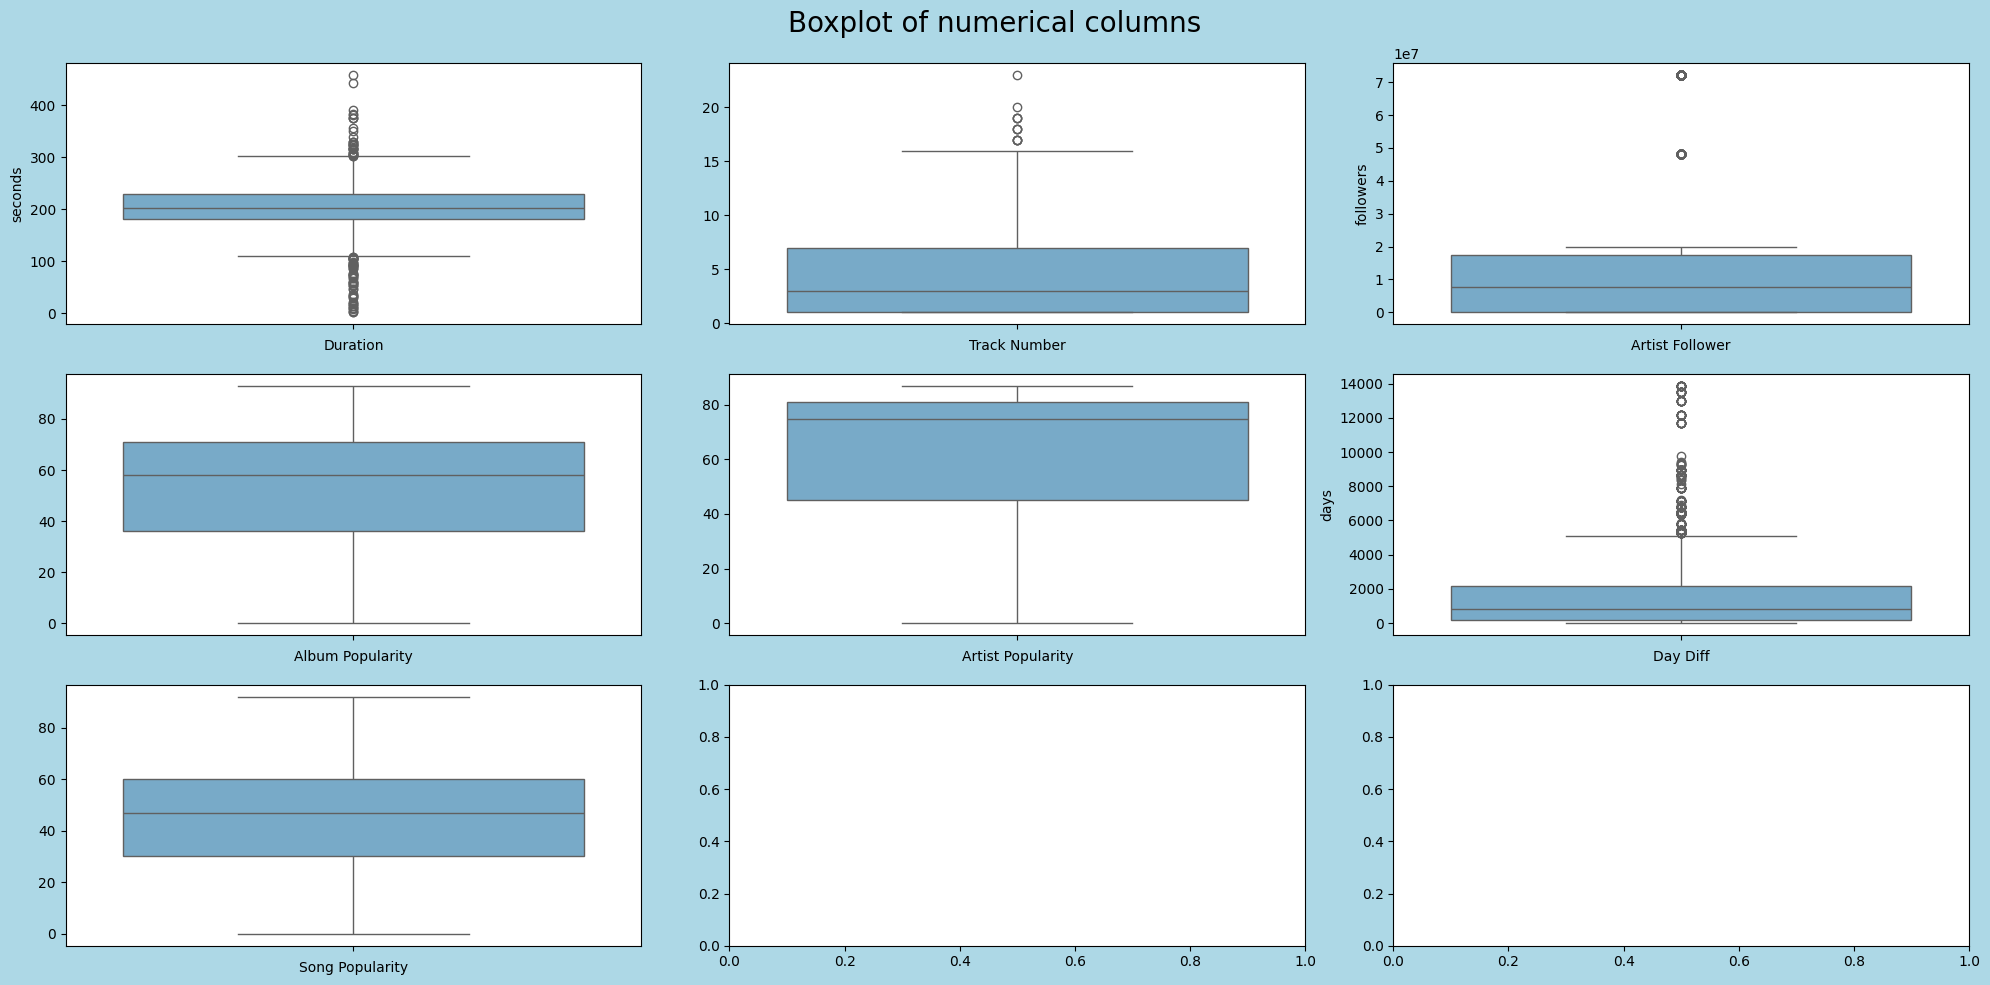

In [141]:
numerical_columns = ['duration', 'track_number', 'artist_follower', 'album_popularity', 'artist_popularity', 'days_diff', 'song_popularity']

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, _, _)) = plt.subplots(3, 3, figsize=(20, 10))
fig.suptitle('Boxplot of numerical columns', fontsize=20)
fig.set_facecolor('#add8e6')

sns.boxplot(data=df["duration"], palette="Blues", ax=ax1)
ax1.set(xlabel='Duration', ylabel='seconds')

sns.boxplot(data=df["track_number"], palette="Blues", ax=ax2)
ax2.set(xlabel='Track Number', ylabel='')

sns.boxplot(data=df["artist_follower"], palette="Blues", ax=ax3)
ax3.set(xlabel='Artist Follower', ylabel='followers')

sns.boxplot(data=df["album_popularity"], palette="Blues", ax=ax4)
ax4.set(xlabel='Album Popularity', ylabel='')

sns.boxplot(data=df["artist_popularity"], palette="Blues", ax=ax5)
ax5.set(xlabel='Artist Popularity', ylabel='')

sns.boxplot(data=df["days_diff"], palette="Blues", ax=ax6)
ax6.set(xlabel='Day Diff', ylabel='days')

sns.boxplot(data=df["song_popularity"], palette="Blues", ax=ax7)
ax7.set(xlabel='Song Popularity', ylabel='')

plt.tight_layout()

* Nhận xét:
    Các đặc trưng Duration, Track Number, Artist Follower, Days Diff có giá trị ngoại lệ. 

##### Histogram

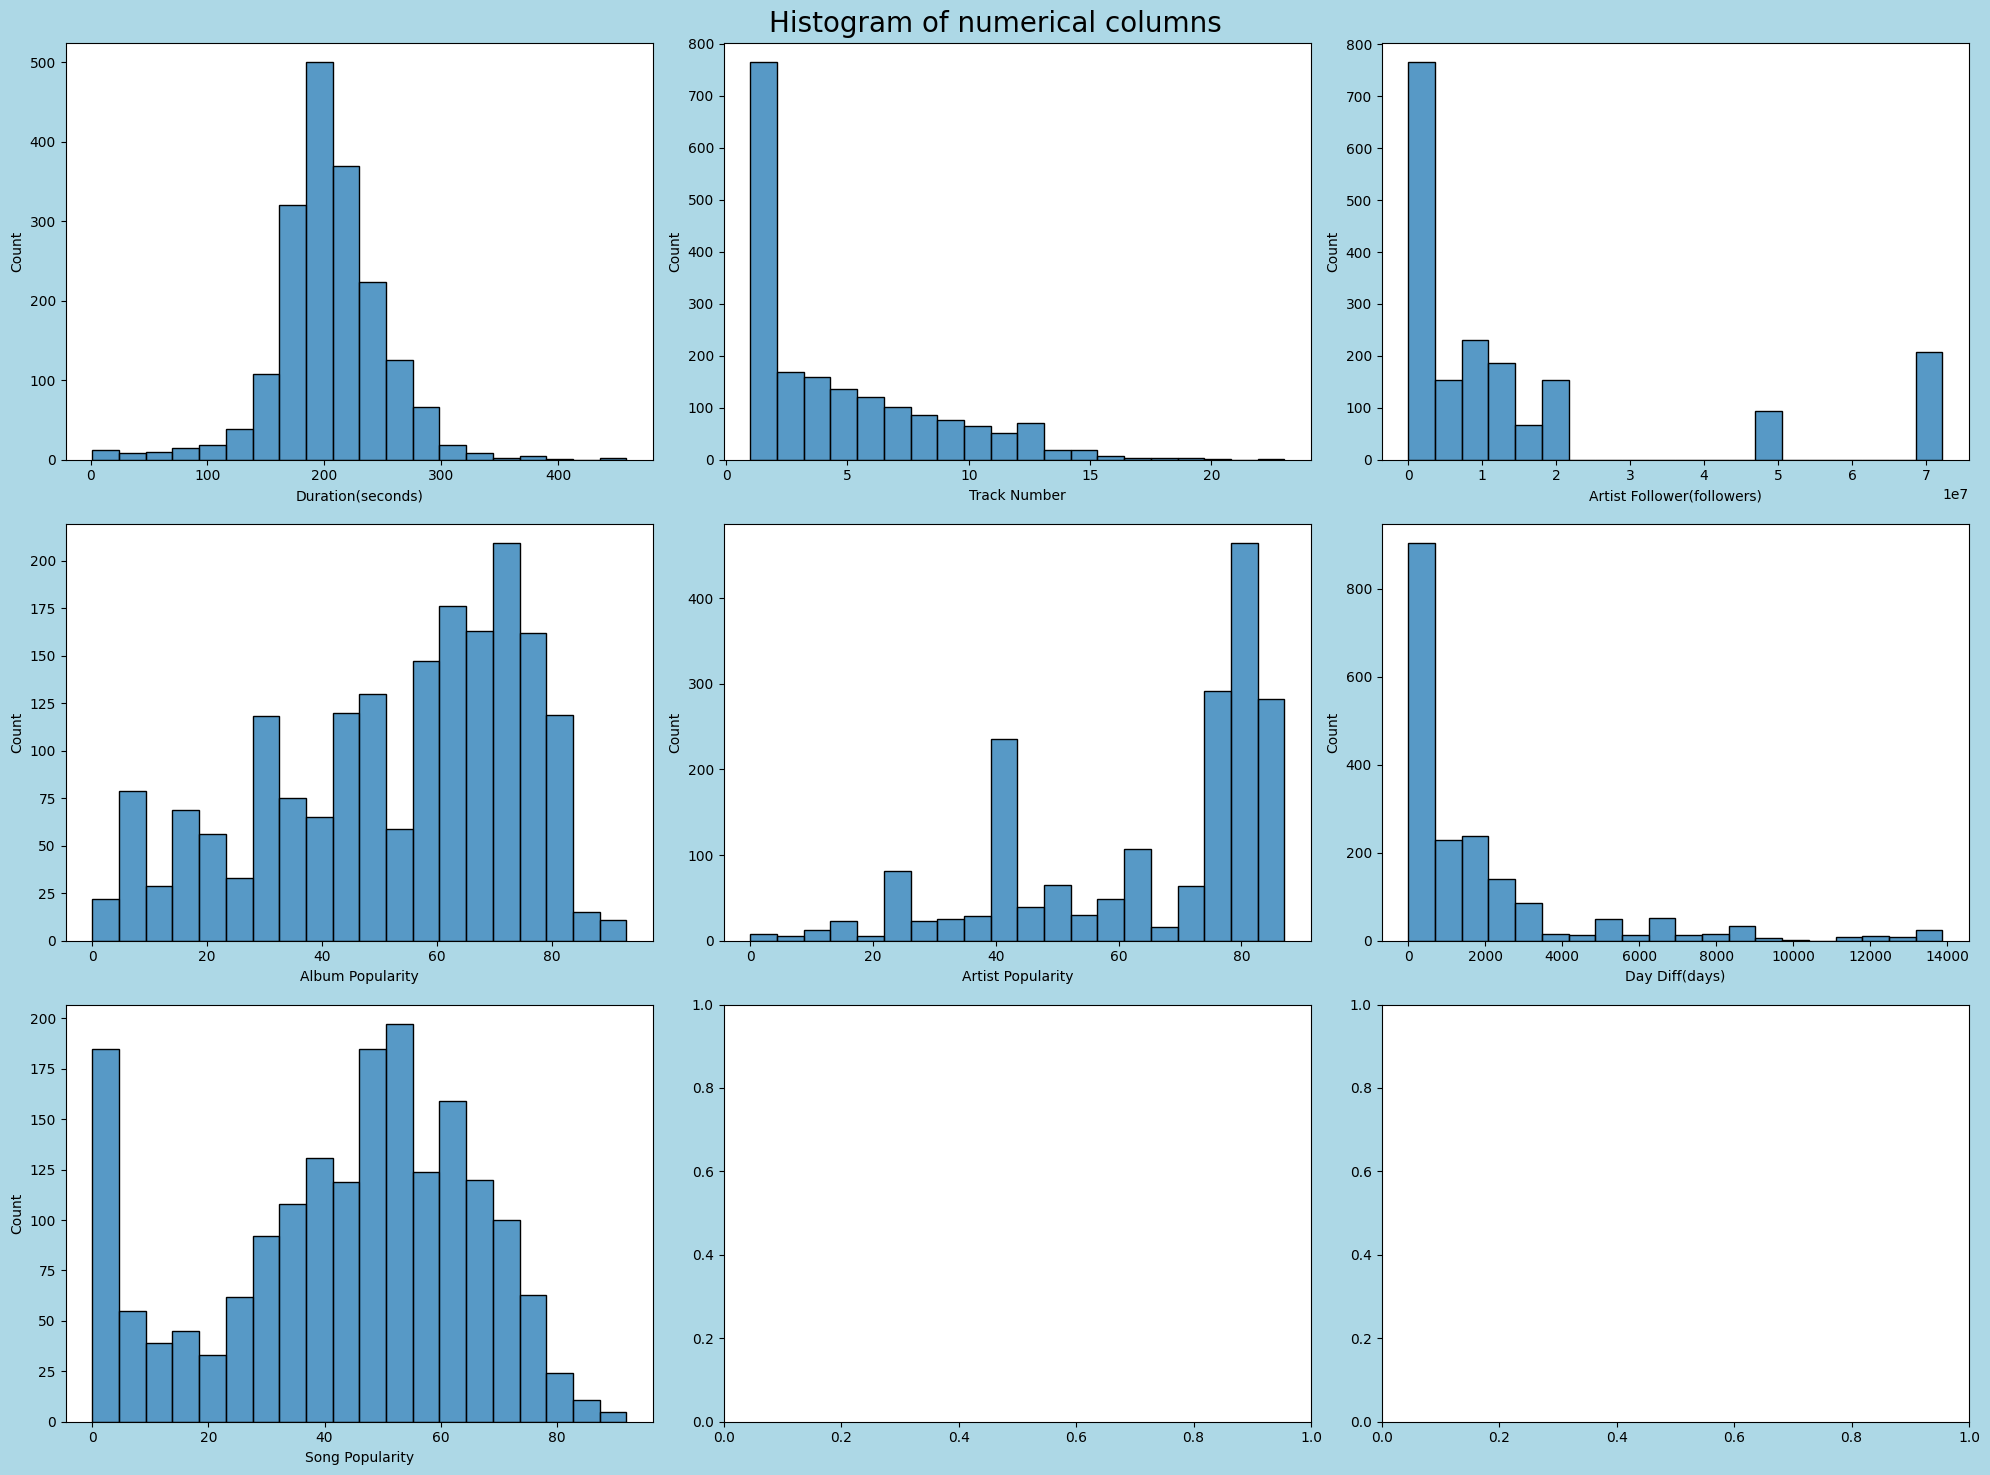

In [142]:
numerical_columns = ['duration', 'track_number', 'artist_follower', 'album_popularity', 'artist_popularity', 'days_diff', 'song_popularity']

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, _, _)) = plt.subplots(3, 3, figsize=(20, 15))
fig.suptitle('Histogram of numerical columns', fontsize=20)
fig.set_facecolor('#add8e6')

sns.histplot(data=df, x='duration', palette="Blues", ax=ax1, bins=20)
ax1.set(xlabel='Duration(seconds)')

sns.histplot(data=df, x='track_number', palette="Blues", ax=ax2, bins=20)
ax2.set(xlabel='Track Number')

sns.histplot(data=df, x='artist_follower', palette="Blues", ax=ax3, bins=20)
ax3.set(xlabel='Artist Follower(followers)')

sns.histplot(data=df, x='album_popularity', palette="Blues", ax=ax4, bins=20)
ax4.set(xlabel='Album Popularity')

sns.histplot(data=df, x='artist_popularity', palette="Blues", ax=ax5, bins=20)
ax5.set(xlabel='Artist Popularity')

sns.histplot(data=df, x='days_diff', palette="Blues", ax=ax6, bins=20)
ax6.set(xlabel='Day Diff(days)')

sns.histplot(data=df["song_popularity"], palette="Blues", ax=ax7, bins=20)
ax7.set(xlabel='Song Popularity')

plt.tight_layout()

Tuy nhiên, đặc trưng Artist Folow có các giá trị ngoài 2 vạch của Box Plot nhưng chiếm số lượng lớn nên không thể coi là giá trị ngoại lệ.

=> NHư vậy, chúng ta tiến hành xử lý các ngoại lệ của đặc trưng Duration, Track Number, Day Diff

* Xử lý Outliers cho cột Duration (3 Sigma Rule - phân phối chuẩn)

In [143]:
# Xử lý Outliers cho cột 'duration'
uppper_boundary=df['duration'].mean() + 3* df['duration'].std()
lower_boundary=df['duration'].mean() - 3* df['duration'].std()

print(f'end={uppper_boundary}, start={lower_boundary}')

song_out_condition = (df['duration'] < lower_boundary) | (df['duration'] > uppper_boundary)
print(f'Có {song_out_condition.sum()} bài hát có thời lượng ngoại lệ')

# Loại bỏ các bài ngoại lệ
df = df[~song_out_condition]
df.shape

end=346.09800090831493, start=62.49091239270817
Có 38 bài hát có thời lượng ngoại lệ


(1819, 15)

In [144]:
# uppper_boundary=df_unique['duration_minutes'].mean() + 3* df_unique['duration_minutes'].std()
# lower_boundary=df_unique['duration_minutes'].mean() - 3* df_unique['duration_minutes'].std()
# print(lower_boundary), print(uppper_boundary),print(df_unique['duration_minutes'].mean())

* Xử lý Outliers cho cột Track Number (IQR - Phân phối xiên)

In [145]:
# Xử lý Outliers cho cột 'track_number'
IQR=df['track_number'].quantile(0.75)-df['track_number'].quantile(0.25)
lower_boundary = df['track_number'].quantile(0.25)-(IQR*1.5)
uppper_boundary = df['track_number'].quantile(0.75)+(IQR*1.5)

print(f'end={uppper_boundary}, start={lower_boundary}')

track_out_condition = (df['track_number'] < lower_boundary) | (df['track_number'] > uppper_boundary)
print(f'Có {track_out_condition.sum()} bài hát có thứ tự trong album là ngoại lệ')

# Loại bỏ các bài ngoại lệ
df = df[~track_out_condition]
df.shape

end=16.0, start=-8.0
Có 12 bài hát có thứ tự trong album là ngoại lệ


(1807, 15)

* Xử lý Outliers cho cột Days Diff (IQR - Phân phối xiên)

In [146]:
# Xử lý Outliers cho cột 'days_diff'
IQR=df['days_diff'].quantile(0.75)-df['days_diff'].quantile(0.25)
lower_boundary=df['days_diff'].quantile(0.25)-(IQR*1.5)
uppper_boundary=df['days_diff'].quantile(0.75)+(IQR*1.5)

print(f'end={uppper_boundary}, start={lower_boundary}')

days_diff_out_condition = (df['days_diff'] < lower_boundary) | (df['days_diff'] > uppper_boundary)
print(f'Có {days_diff_out_condition.sum()} bài hát có tuổi đời ngoại lệ')

# Loại bỏ các bài ngoại lệ
df = df[~days_diff_out_condition]
df.shape

end=5160.5, start=-2755.5
Có 211 bài hát có tuổi đời ngoại lệ


(1596, 15)

* Box Plot sau khi loại bỏ ngoại lệ

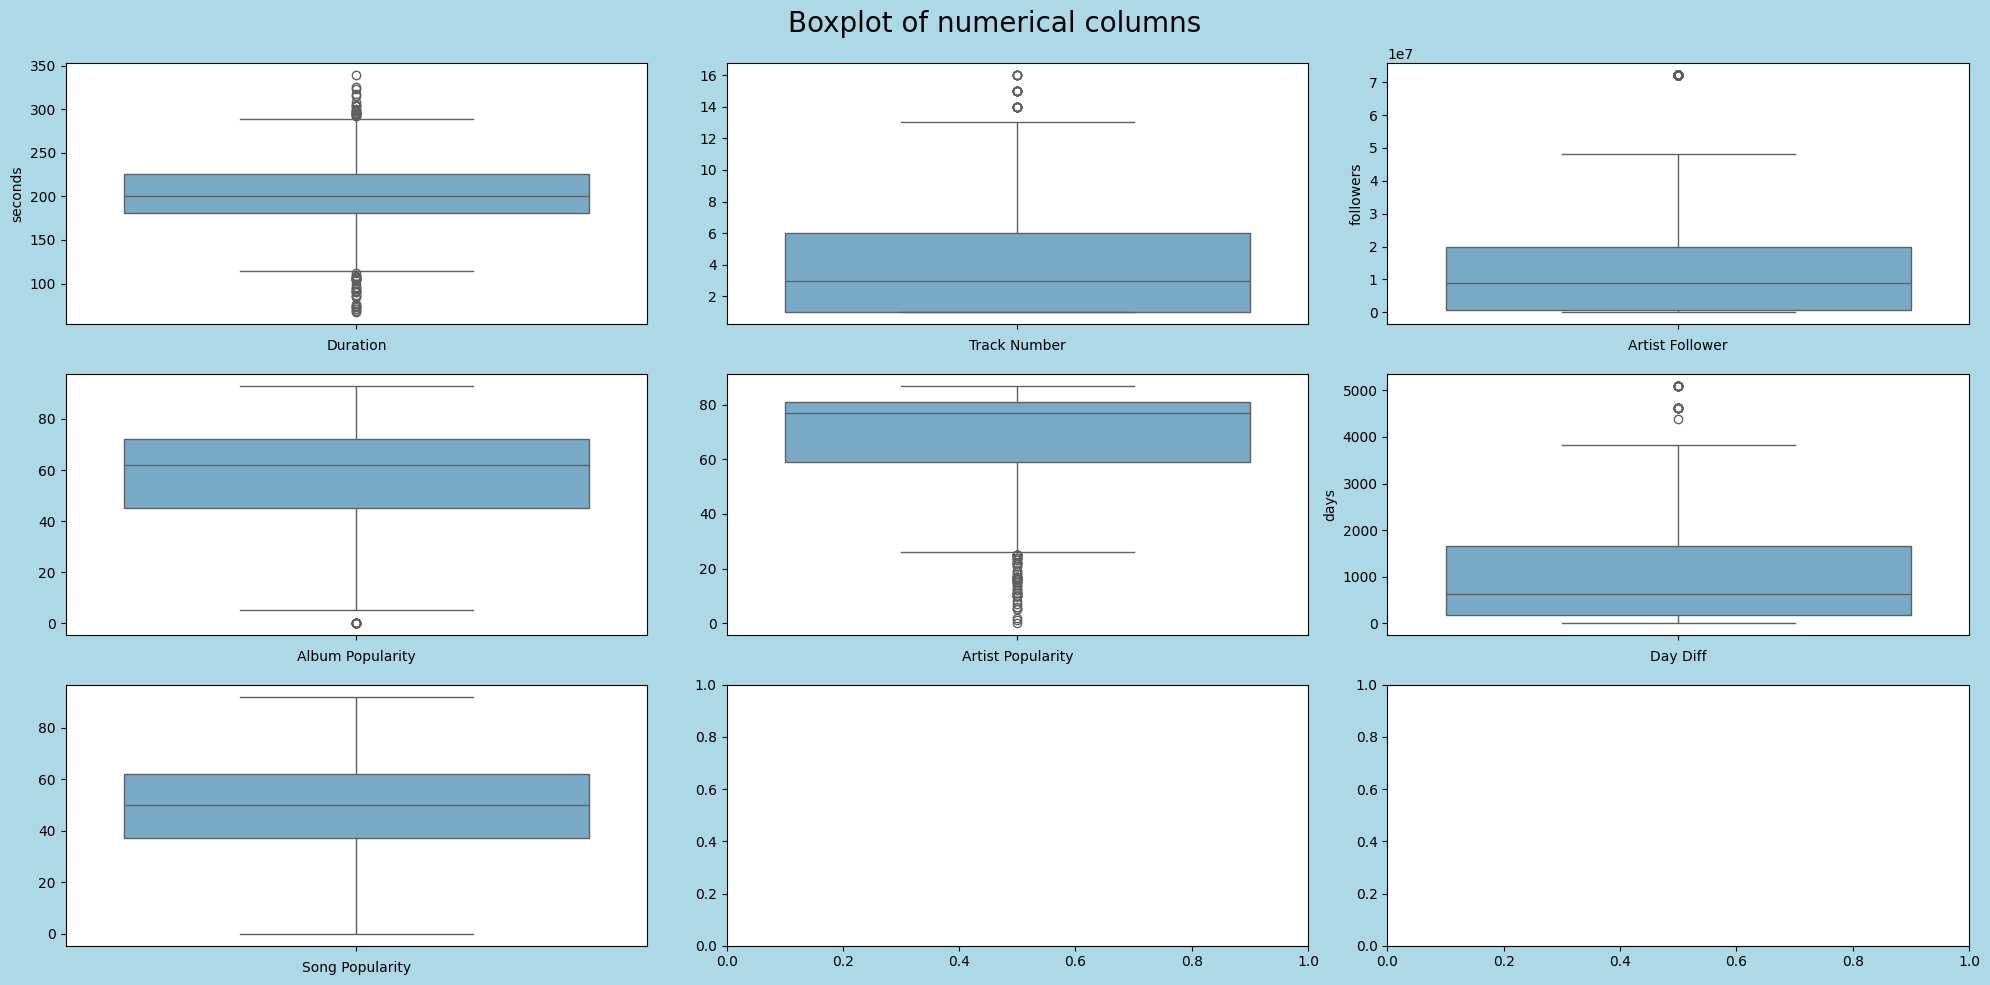

In [147]:
numerical_columns = ['duration', 'track_number', 'artist_follower', 'album_popularity', 'artist_popularity', 'days_diff', 'song_popularity']

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, _, _)) = plt.subplots(3, 3, figsize=(20, 10))
fig.suptitle('Boxplot of numerical columns', fontsize=20)
fig.set_facecolor('#add8e6')

sns.boxplot(data=df["duration"], palette="Blues", ax=ax1)
ax1.set(xlabel='Duration', ylabel='seconds')

sns.boxplot(data=df["track_number"], palette="Blues", ax=ax2)
ax2.set(xlabel='Track Number', ylabel='')

sns.boxplot(data=df["artist_follower"], palette="Blues", ax=ax3)
ax3.set(xlabel='Artist Follower', ylabel='followers')

sns.boxplot(data=df["album_popularity"], palette="Blues", ax=ax4)
ax4.set(xlabel='Album Popularity', ylabel='')

sns.boxplot(data=df["artist_popularity"], palette="Blues", ax=ax5)
ax5.set(xlabel='Artist Popularity', ylabel='')

sns.boxplot(data=df["days_diff"], palette="Blues", ax=ax6)
ax6.set(xlabel='Day Diff', ylabel='days')

sns.boxplot(data=df["song_popularity"], palette="Blues", ax=ax7)
ax7.set(xlabel='Song Popularity', ylabel='')

plt.tight_layout()

* Histogram sau khi loại bỏ ngoại lệ

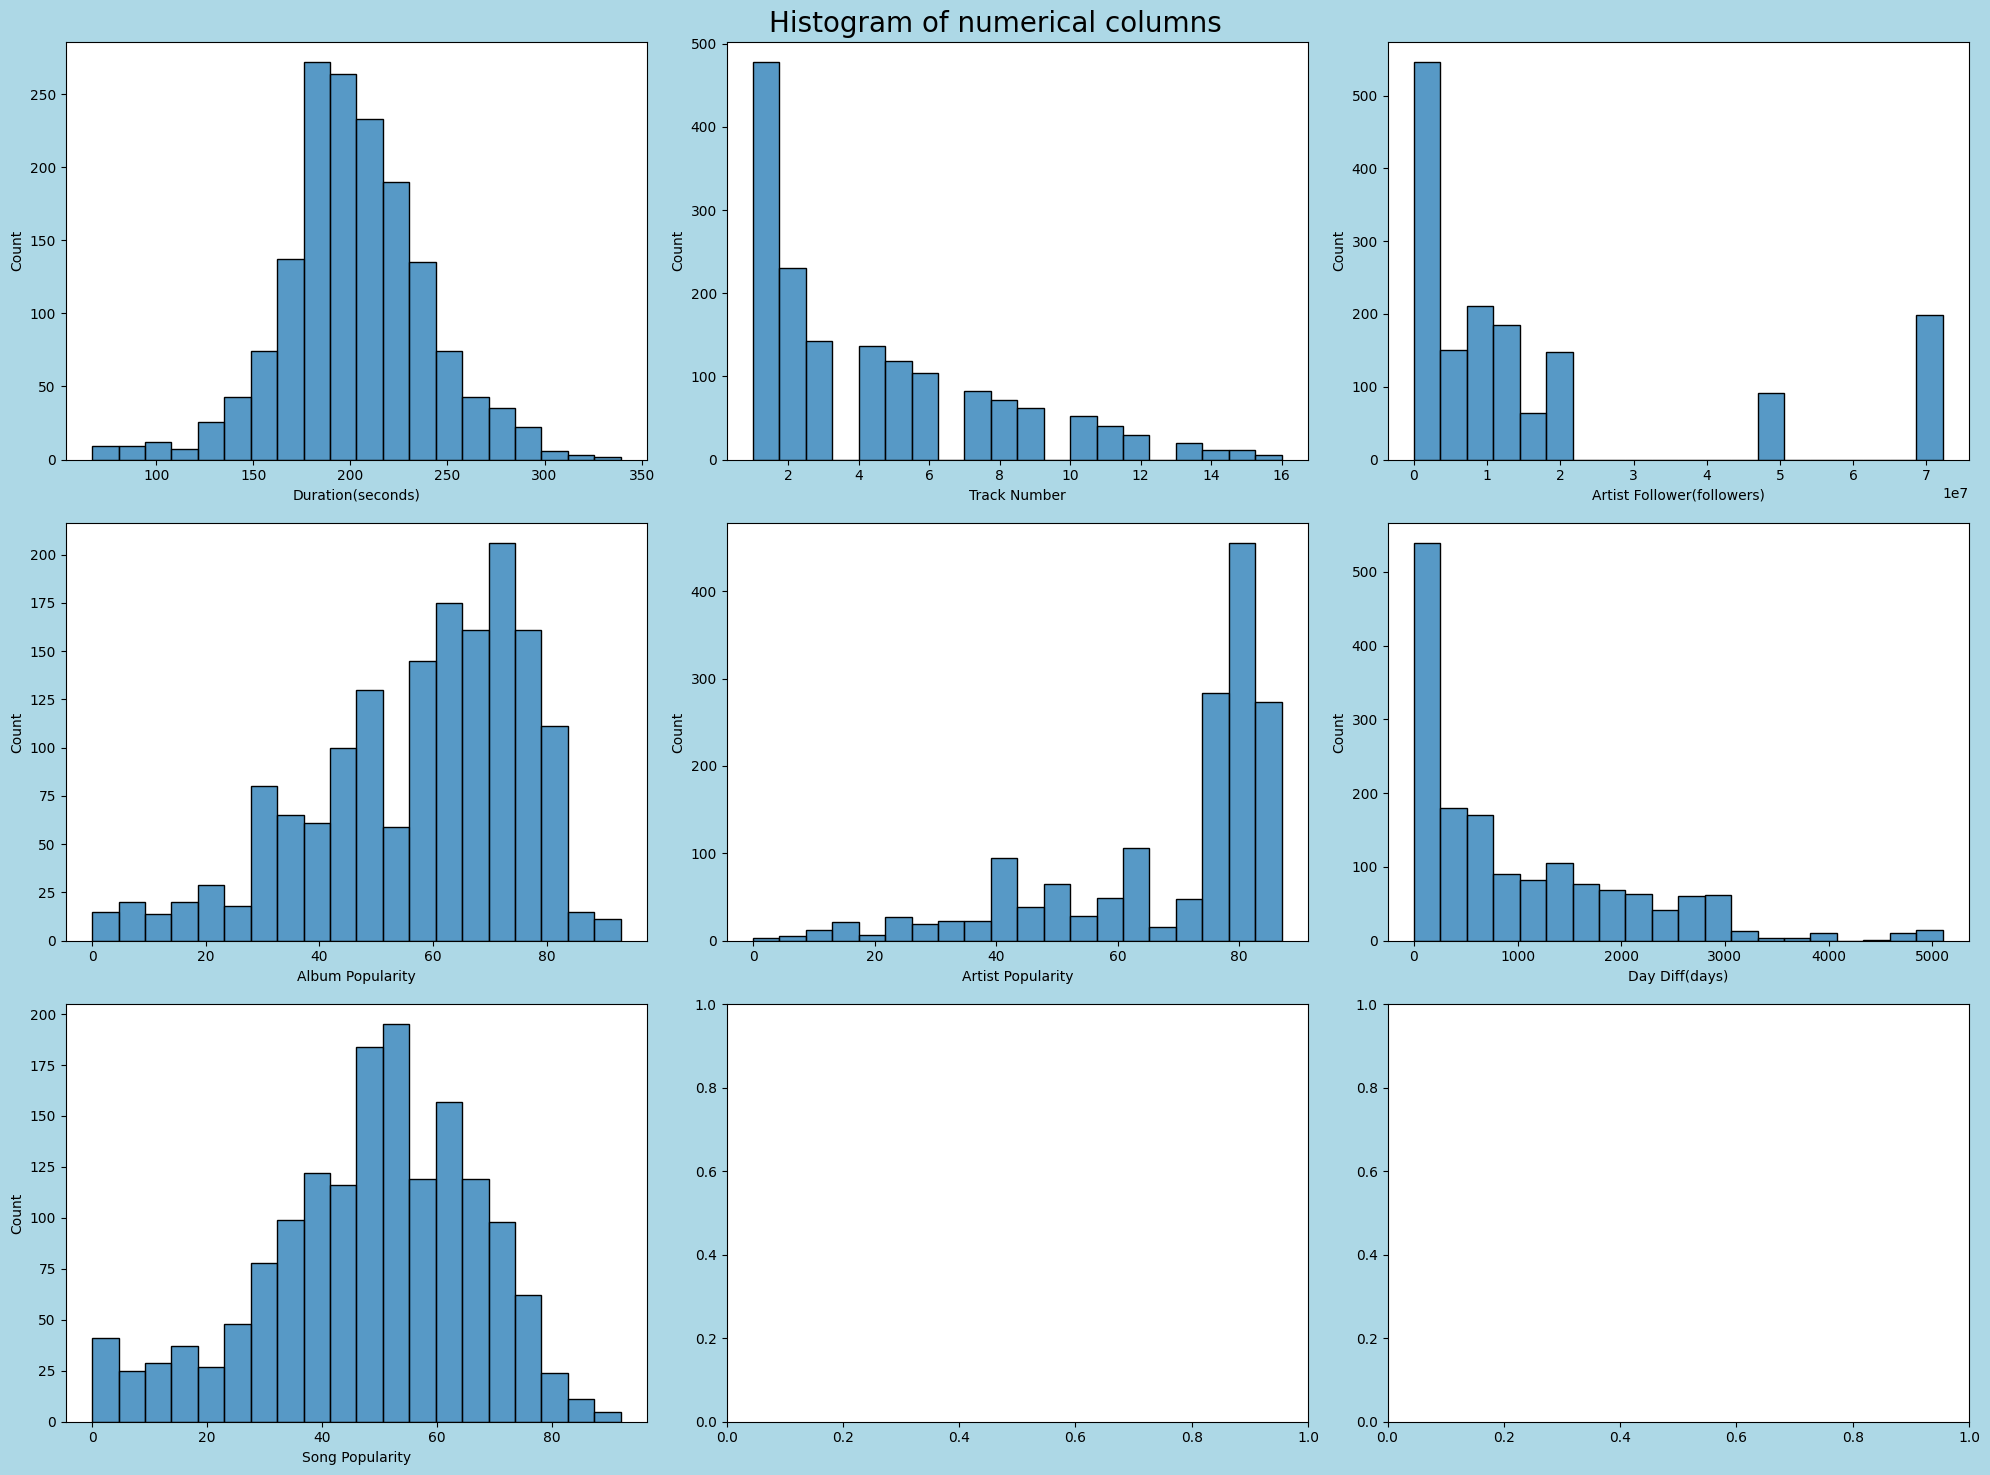

In [148]:
numerical_columns = ['duration', 'track_number', 'artist_follower', 'album_popularity', 'artist_popularity', 'days_diff', 'song_popularity']

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, _, _)) = plt.subplots(3, 3, figsize=(20, 15))
fig.suptitle('Histogram of numerical columns', fontsize=20)
fig.set_facecolor('#add8e6')

sns.histplot(data=df, x='duration', palette="Blues", ax=ax1, bins=20)
ax1.set(xlabel='Duration(seconds)')

sns.histplot(data=df, x='track_number', palette="Blues", ax=ax2, bins=20)
ax2.set(xlabel='Track Number')

sns.histplot(data=df, x='artist_follower', palette="Blues", ax=ax3, bins=20)
ax3.set(xlabel='Artist Follower(followers)')

sns.histplot(data=df, x='album_popularity', palette="Blues", ax=ax4, bins=20)
ax4.set(xlabel='Album Popularity')

sns.histplot(data=df, x='artist_popularity', palette="Blues", ax=ax5, bins=20)
ax5.set(xlabel='Artist Popularity')

sns.histplot(data=df, x='days_diff', palette="Blues", ax=ax6, bins=20)
ax6.set(xlabel='Day Diff(days)')

sns.histplot(data=df["song_popularity"], palette="Blues", ax=ax7, bins=20)
ax7.set(xlabel='Song Popularity')

plt.tight_layout()

#### Lưu kết quả đã clean vào file cleaned_data.csv

In [149]:
# Xóa các cột không cần xử lý nữa
df['popularity'] = df['song_popularity'].copy()
df.drop(columns=['crawl_date', 'duration', 'song_popularity'] , axis=1, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1596 entries, 0 to 3823
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   song_id            1596 non-null   object        
 1   name               1596 non-null   object        
 2   artist_name        1596 non-null   object        
 3   album              1596 non-null   object        
 4   duration_ms        1596 non-null   int64         
 5   track_number       1596 non-null   int64         
 6   artist_follower    1596 non-null   int64         
 7   album_popularity   1596 non-null   int64         
 8   artist_popularity  1596 non-null   int64         
 9   release_date       1596 non-null   datetime64[ns]
 10  genres             1596 non-null   object        
 11  days_diff          1596 non-null   float64       
 12  popularity         1596 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(6), object(5)
memory usage: 

In [150]:
df.to_csv('cleaned_data.csv', index=False)